# Pedido:
Reviews: sentiment analysis: 
'0' si es malo, 
'1' si es neutral y 
'2' si es positivo. 
Si ausente la reseña escrita, debe tomar el valor de 1.

developer
contenido free en %
año
cant items

user_id
dinero gastado
recomendación en %
cant de items

usuario
horas jugadas por género
año de lanzamiento
horas de juego acumuladas


mejor desarrollador
con más juegos recomendados
por usuario
por año

desarrollador 
reseñas positivas o negativas

ml: coseno de similitud
user-item(usuario): id_usuario y 5 juegos recomendados similares
item-item(producto): id_producto y 5 juegos recomendados similares


# Archivo de Reviews

In [130]:
# Importar librerías Python 3.11.5
import gzip
import pandas as pd
import json
import jsonlines
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re


In [131]:
# Descomprimir el archivo gzip Reviews
data = []

with gzip.open("user_reviews.json.gz", "rt", encoding = "utf-8") as file:
    for line in file:
        try:
            json_data = ast.literal_eval(line)
            data.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {line}")
            continue
df = pd.DataFrame(data)

In [132]:
# Ver dataframe:
df.head(5)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [133]:
# Ver columna de reviews:
df.loc[0,"reviews"]  # funny, posted, last_edited, item_id, helpful, recommend, review

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [134]:
# Desanidar la columna anidada "Reviews":
data_desanidada = []

for index, row in df.iterrows():
    user_id = row['user_id']
    reviews = row['reviews']
    
    for i in reviews:   
        new_row = {
        'user_id': user_id,
        'reviews' : reviews,
        'funny': i.get('funny', ''),
        'posted': i.get('posted', ''),
        'last_edited': i.get('last_edited', ''),
        'item_id': i.get('item_id', ''),
        'helpful': i.get('helpful', ''),
        'recommend': i.get('recommend', bool),
        'review': i.get('review', '')
        }
        
        data_desanidada.append(new_row)

In [135]:
# DataFrame desanidada:
df_i_desanidado = pd.DataFrame(data_desanidada)

In [136]:
# Mirar dataframe final:
df_i_desanidado.head(2)

,user_id,reviews,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...",,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...",,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.


ETL (nulos y duplicados):

In [137]:
# Revisar NaNs:
df_i_desanidado.isna().sum()

user_id        0
reviews        0
funny          0
posted         0
last_edited    0
item_id        0
helpful        0
recommend      0
review         0
dtype: int64

In [138]:
# Analizador de sentimientos VADER:
analyzer = SentimentIntensityAnalyzer()

In [139]:
# Función para realizar el análisis de sentimiento:
def analyze_sentiment(review):
    # Obtener el puntaje de polaridad del sentimiento
    compound_score = analyzer.polarity_scores(str(review))["compound"]

    # Clasificar la polaridad del sentimiento en 3 categorías: negativo, neutral, positivo
    if compound_score < 0:
        return 0  # Sentimiento negativo
    elif compound_score == 0:
        return 1  # Sentimiento neutral
    else:
        return 2  # Sentimiento positivo

In [140]:
# Aplicar el análisis de sentimiento a la columna "review"    1 min y 21 seg
df_i_desanidado["sentiment_analysis"] = df_i_desanidado["review"].apply(analyze_sentiment)

In [141]:
# Revisar NaNs:
df_i_desanidado.isna().sum()

user_id               0
reviews               0
funny                 0
posted                0
last_edited           0
item_id               0
helpful               0
recommend             0
review                0
sentiment_analysis    0
dtype: int64

In [142]:
# Ver dataframe:
df_i_desanidado.head(2)

,user_id,reviews,funny,posted,last_edited,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...",,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...",,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,2


In [143]:
# Info de la dataframe:
df_i_desanidado.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   reviews             59305 non-null  object
 2   funny               59305 non-null  object
 3   posted              59305 non-null  object
 4   last_edited         59305 non-null  object
 5   item_id             59305 non-null  object
 6   helpful             59305 non-null  object
 7   recommend           59305 non-null  bool  
 8   review              59305 non-null  object
 9   sentiment_analysis  59305 non-null  int64 
dtypes: bool(1), int64(1), object(8)
memory usage: 4.1+ MB


In [144]:
# Eliminar columnas reviews, funny, helpful, review
df_i_desanidado.drop(["reviews", "funny", "helpful", "review"], axis=1, inplace=True)

In [145]:
# Ver la data nuevamente:
df_i_desanidado

,user_id,posted,last_edited,item_id,recommend,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",,1250,True,2
1,76561197970982479,"Posted July 15, 2011.",,22200,True,2
2,76561197970982479,"Posted April 21, 2011.",,43110,True,2
3,js41637,"Posted June 24, 2014.",,251610,True,2
4,js41637,"Posted September 8, 2013.",,227300,True,2
...,...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,,70,True,2
59301,76561198312638244,Posted July 8.,,362890,True,2
59302,LydiaMorley,Posted July 3.,,273110,True,2
59303,LydiaMorley,Posted July 20.,,730,True,2


In [146]:
# Ver columna de posted:
df_i_desanidado.loc[0,"posted"]

'Posted November 5, 2011.'

In [147]:
# DataFrame df_i_desanidado, extraer fecha:
data = {"posted"}
df_fecha = pd.DataFrame(data)

# Función para extraer la fecha
def extraer_fecha(texto):
    patron = r"Posted (\w+) (\d+), (\d{4})."
    match = re.match(patron, texto)
    if match:
        mes, dia, anio = match.groups()
        fecha_string = f"{anio}-{mes}-{dia}"
        return pd.to_datetime(fecha_string)
    else:
        return None

In [148]:
# Aplicar la función a la columna "posted"
df_i_desanidado["Fecha extraida"] = df_i_desanidado["posted"].apply(extraer_fecha)

In [149]:
# Verificar:
df_i_desanidado.tail(5)

,user_id,posted,last_edited,item_id,recommend,sentiment_analysis,Fecha extraida
59300,76561198312638244,Posted July 10.,,70,True,2,NaT
59301,76561198312638244,Posted July 8.,,362890,True,2,NaT
59302,LydiaMorley,Posted July 3.,,273110,True,2,NaT
59303,LydiaMorley,Posted July 20.,,730,True,2,NaT
59304,LydiaMorley,Posted July 2.,,440,True,2,NaT


In [150]:
# Contar el número de registros nulos en la columna Fecha extraida:
print(df_i_desanidado["Fecha extraida"].isnull().sum())

10119


In [151]:
# Revisar columna last_edited:
df_i_desanidado["last_edited"].unique()

array(['', 'Last edited December 5, 2015.',
       'Last edited November 25, 2013.', ...,
       'Last edited April 17, 2014.', 'Last edited May 10, 2014.',
       'Last edited August 15, 2014.'], dtype=object)

In [152]:
# DataFrame df_i_desanidado, extraer fecha de last_edited:
data = {"last_edited"}
df_fecha = pd.DataFrame(data)

# Función para extraer la fecha
def extraer_fecha(texto):
    patron = r"Last_edited (\w+) (\d+), (\d{4})."
    match = re.match(patron, texto)
    if match:
        mes, dia, anio = match.groups()
        fecha_string = f"{anio}-{mes}-{dia}"
        return pd.to_datetime(fecha_string)
    else:
        return None

In [153]:
# Aplicar la función a la columna "last_edited"
df_i_desanidado["Fecha_editada"] = df_i_desanidado["last_edited"].apply(extraer_fecha)

In [154]:
# Verificar:
df_i_desanidado

,user_id,posted,last_edited,item_id,recommend,sentiment_analysis,Fecha extraida,Fecha_editada
0,76561197970982479,"Posted November 5, 2011.",,1250,True,2,2011-11-05,None
1,76561197970982479,"Posted July 15, 2011.",,22200,True,2,2011-07-15,None
2,76561197970982479,"Posted April 21, 2011.",,43110,True,2,2011-04-21,None
3,js41637,"Posted June 24, 2014.",,251610,True,2,2014-06-24,None
4,js41637,"Posted September 8, 2013.",,227300,True,2,2013-09-08,None
...,...,...,...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,,70,True,2,NaT,None
59301,76561198312638244,Posted July 8.,,362890,True,2,NaT,None
59302,LydiaMorley,Posted July 3.,,273110,True,2,NaT,None
59303,LydiaMorley,Posted July 20.,,730,True,2,NaT,None


In [155]:
# Crear un DataFrame con una nueva columna llamada fecha final:
# Verificar si la columna "Fecha_editada" existe
if "Fecha_editada" in df_i_desanidado.columns:
    # Crear la nueva columna con la fecha de "Fecha_editada" o cero
    df_i_desanidado["Fecha_final"] = df_i_desanidado["Fecha_editada"].fillna(0)
else:
    # Si "Fecha_editada" no existe, crear la nueva columna con ceros
    df_i_desanidado["Fecha_editada"] = 0

In [156]:
# Verificar dataframe:
df_i_desanidado

,user_id,posted,last_edited,item_id,recommend,sentiment_analysis,Fecha extraida,Fecha_editada,Fecha_final
0,76561197970982479,"Posted November 5, 2011.",,1250,True,2,2011-11-05,None,0
1,76561197970982479,"Posted July 15, 2011.",,22200,True,2,2011-07-15,None,0
2,76561197970982479,"Posted April 21, 2011.",,43110,True,2,2011-04-21,None,0
3,js41637,"Posted June 24, 2014.",,251610,True,2,2014-06-24,None,0
4,js41637,"Posted September 8, 2013.",,227300,True,2,2013-09-08,None,0
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,,70,True,2,NaT,None,0
59301,76561198312638244,Posted July 8.,,362890,True,2,NaT,None,0
59302,LydiaMorley,Posted July 3.,,273110,True,2,NaT,None,0
59303,LydiaMorley,Posted July 20.,,730,True,2,NaT,None,0


In [157]:
# Verificar si la columna 'Fecha_extraida' existe:
if "Fecha extraida" in df_i_desanidado.columns:
    # Copiar el valor de 'Fecha_extraida' a 'Fecha_final' si 'Fecha_final' está en cero
    df_i_desanidado.loc[df_i_desanidado["Fecha_final"] == 0, "Fecha_final"] = df_i_desanidado["Fecha extraida"]
else:
    print("La columna", "Fecha extraida", "no existe en el DataFrame.")

In [158]:
# Convertir la columna 'Fecha_final' a tipo datetime si aún no lo está:
df_i_desanidado["Fecha_final"] = pd.to_datetime(df_i_desanidado["Fecha_final"])

# Obtener solo la fecha (sin la hora)
df_i_desanidado["Fecha_final"] = df_i_desanidado["Fecha_final"].dt.date

In [159]:
# Verificar dataframe:
df_i_desanidado

,user_id,posted,last_edited,item_id,recommend,sentiment_analysis,Fecha extraida,Fecha_editada,Fecha_final
0,76561197970982479,"Posted November 5, 2011.",,1250,True,2,2011-11-05,None,2011-11-05
1,76561197970982479,"Posted July 15, 2011.",,22200,True,2,2011-07-15,None,2011-07-15
2,76561197970982479,"Posted April 21, 2011.",,43110,True,2,2011-04-21,None,2011-04-21
3,js41637,"Posted June 24, 2014.",,251610,True,2,2014-06-24,None,2014-06-24
4,js41637,"Posted September 8, 2013.",,227300,True,2,2013-09-08,None,2013-09-08
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,,70,True,2,NaT,None,NaN
59301,76561198312638244,Posted July 8.,,362890,True,2,NaT,None,NaN
59302,LydiaMorley,Posted July 3.,,273110,True,2,NaT,None,NaN
59303,LydiaMorley,Posted July 20.,,730,True,2,NaT,None,NaN


In [160]:
# Eliminar columnas posted, last_edited, Fecha extraida, Fecha editada:
df_i_desanidado.drop(["posted", "last_edited", "Fecha extraida", "Fecha_editada"], axis=1, inplace=True)

In [161]:
# Cuántos nulos hay en columna Fecha_final:
df_i_desanidado.isnull().sum()

user_id                   0
item_id                   0
recommend                 0
sentiment_analysis        0
Fecha_final           10119
dtype: int64

In [167]:
# Convertir la columna Fecha_final a tipo datetime:
df_i_desanidado["Fecha_final"] = pd.to_datetime(df_i_desanidado["Fecha_final"])
# Obtener solo la fecha (sin la hora)
df_i_desanidado["Fecha_final"] = df_i_desanidado["Fecha_final"].dt.date

In [168]:
# Llenar los valores nulos con cero:
df_i_desanidado["Fecha_final"].fillna(0, inplace=True)

In [172]:
# Verificar:
df_i_desanidado.isnull().sum()

user_id               0
item_id               0
recommend             0
sentiment_analysis    0
Fecha_final           0
dtype: int64

In [174]:
df_i_desanidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   item_id             59305 non-null  object
 2   recommend           59305 non-null  bool  
 3   sentiment_analysis  59305 non-null  int64 
 4   Fecha_final         59305 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.9+ MB


EDA: descripción estadística y gráficas:

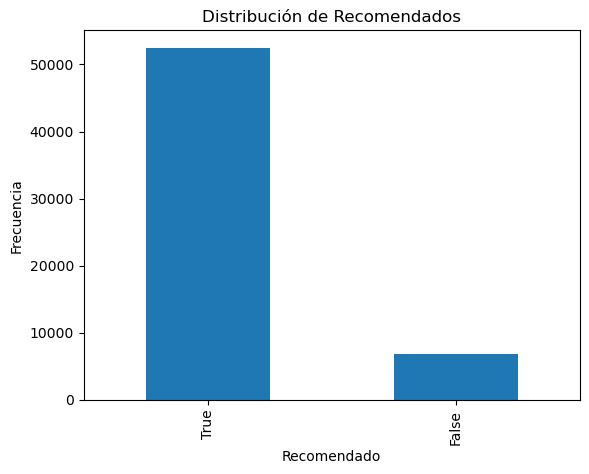

In [175]:
# Graficar un histograma de la columna "recommend"
df_i_desanidado["recommend"].value_counts().plot(kind="bar")
plt.xlabel("Recomendado")
plt.ylabel("Frecuencia")
plt.title("Distribución de Recomendados")
plt.show()

La mayoría de las recomendaciones son a favor de jugar (True en mayor frecuencia).

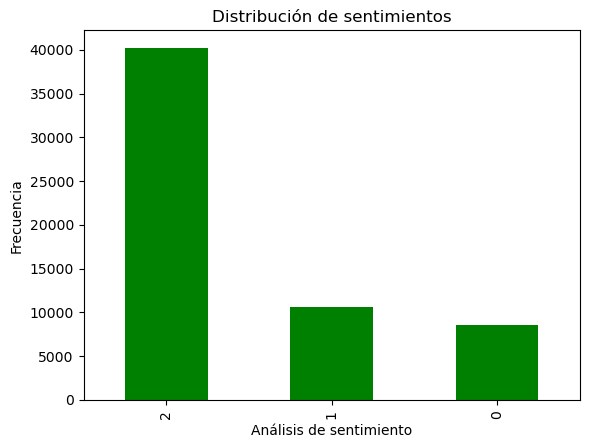

In [177]:
# Graficar un histograma de la columna "sentiment_analysis"   
df_i_desanidado["sentiment_analysis"].value_counts().plot(kind="bar", color="green")
plt.xlabel("Análisis de sentimiento")
plt.ylabel("Frecuencia")
plt.title("Distribución de sentimientos")
plt.show()

Los sentimientos vienen de las reseñas de los usuarios de videojuegos: 2 es positivo (más frecuente en las reseñas), 1 es neutral, 0 es negativo (son los menos).

In [179]:
# Guardamos nueva data en un archivo .csv
df_i_desanidado.to_csv("Second_Reviews.csv", index=False)